In [58]:
#importing packages
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import seaborn as sns
import re
import matplotlib.pyplot as plt
%matplotlib inline

# Gathering

In [45]:
# Import the Twitter archive CSV file 
archive_df= pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
archive_df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
# Download tweet image predictions TSV using the Requests library and write it to image_predictions.tsv
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)
    



In [18]:
# Import the tweet image predictions TSV file into a DataFrame
img_df = pd.read_csv('image_predictions.tsv', sep='\t')
img_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [20]:
#Twitter API's JSON data
consumer_key = 'X'
consumer_secret = 'X'
access_token = 'X'
access_token_secret = 'X'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, parser=tweepy.parsers.JSONParser(), wait_on_rate_limit=True)

In [11]:
tweet_status

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]},


In [21]:
tweet_ids= list(archive_df.tweet_id)
tweet_data={}
for tweet_id in tweet_ids:
    try:
        tweet_status=api.get_status(tweet_id,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)
        tweet_data[str(tweet_id)]=tweet_status
        #print(tweet_ids.index(tweet_id) + 1)
    except Exception as e:
        print(e)
        print("Error for: " + str(tweet_id))
        print(tweet_ids.index(tweet_id) + 1)

[{'code': 144, 'message': 'No status found with that ID.'}]
Error for: 888202515573088257
20 / 2354
[{'code': 144, 'message': 'No status found with that ID.'}]
Error for: 873697596434513921
96 / 2354
[{'code': 144, 'message': 'No status found with that ID.'}]
Error for: 872668790621863937
102 / 2354
[{'code': 144, 'message': 'No status found with that ID.'}]
Error for: 872261713294495745
105 / 2354
[{'code': 144, 'message': 'No status found with that ID.'}]
Error for: 869988702071779329
119 / 2354
[{'code': 144, 'message': 'No status found with that ID.'}]
Error for: 866816280283807744
133 / 2354
[{'code': 144, 'message': 'No status found with that ID.'}]
Error for: 861769973181624320
156 / 2354
[{'code': 144, 'message': 'No status found with that ID.'}]
Error for: 856602993587888130
183 / 2354
[{'code': 144, 'message': 'No status found with that ID.'}]
Error for: 845459076796616705
248 / 2354
[{'code': 144, 'message': 'No status found with that ID.'}]
Error for: 844704788403113984
254

In [22]:
with open('tweet_json.txt', 'w') as file:
    json.dump(tweet_data, file)

In [5]:
with open('tweet_json.txt') as file:
    data=json.load(file)
t_list=[]
for tweet_id in data.keys():
    retweets = data[tweet_id]['retweet_count']
    favorites = data[tweet_id]['favorite_count']
    t_list.append({'tweet_id': tweet_id,
                        'retweets': retweets,
                        'favorites': favorites})
    
tweets_df = pd.DataFrame(t_list, columns = ['tweet_id', 'retweets', 'favorites'])
tweets_df.sample(5)


,tweet_id,retweets,favorites
229,847157206088847362,6100,20450
1142,724004602748780546,1643,4316
1183,716447146686459905,6187,13503
389,824325613288833024,11144,12368
1839,675501075957489664,6010,17432


# Assesement

### We have three dataframes:

#### tweets_df which has retweet and favorite counts
#### img_predictions_df which has the results of a neural network trying to identify dog breed in a tweet's picture
#### archive_df which has the tweet's text, rating, and dog category

In [6]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 3 columns):
tweet_id     2337 non-null object
retweets     2337 non-null int64
favorites    2337 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.9+ KB


In [19]:
img_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [ ]:
archive_df.info()

In [8]:
archive_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [9]:
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
archive_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [11]:
#Checking for duplicates
archive_df[archive_df.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [12]:
#Checking the rating values for numerator 
archive_df['rating_numerator'].value_counts().sort_values()

20        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
26        1
182       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
143       1
24        1
204       1
80        1
121       1
75        2
15        2
0         2
420       2
2         9
1         9
4        17
3        19
6        32
5        37
14       54
7        55
8       102
9       158
13      351
10      461
11      464
12      558
Name: rating_numerator, dtype: int64

In [13]:
#Checking the rating values for  denominator
archive_df['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [14]:
#identifying the rating with 0
archive_df[archive_df['rating_denominator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [62]:
#There are cases where there are multiple dog stages in a row. 
archive_df.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1976
1,None,None,None,puppo,29
2,None,None,pupper,None,245
3,None,floofer,None,None,9
4,doggo,None,None,None,83
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,12
7,doggo,floofer,None,None,1


In [15]:
#Checking the dog names
dog_names_list = []
dog_names_list = archive_df['name'].unique()
dog_names_list.sort()
dog_names_list


array(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al',
       'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander',
       'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice', 'Amber', 'Ambrose',
       'Amy', 'Amélie', 'Anakin', 'Andru', 'Andy', 'Angel', 'Anna',
       'Anthony', 'Antony', 'Apollo', 'Aqua', 'Archie', 'Arlen', 'Arlo',
       'Arnie', 'Arnold', 'Arya', 'Ash', 'Asher', 'Ashleigh', 'Aspen',
       'Astrid', 'Atlas', 'Atticus', 'Aubie', 'Augie', 'Autumn', 'Ava',
       'Axel', 'Bailey', 'Baloo', 'Balto', 'Banditt', 'Banjo', 'Barclay',
       'Barney', 'Baron', 'Barry', 'Batdog', 'Bauer', 'Baxter', 'Bayley',
       'BeBe', 'Bear', 'Beau', 'Beckham', 'Beebop', 'Beemo', 'Bell',
       'Bella', 'Belle', 'Ben', 'Benedict', 'Benji', 'Benny', 'Bentley',
       'Berb', 'Berkeley', 'Bernie', 'Bert', 'Bertson', 'Betty', 'Beya',
       'Biden', 'Bilbo', 'Billl', 'Billy', 'Binky', 'Birf', 'Bisquick',
       'Blakely', 'Blanket', 'Blipson', 'Blitz', 'Bloo', 'Bloop', 'Blu',

In [16]:
#Checking for complete text
text = archive_df['text'][320]
text

'Meet Chester (bottom) &amp; Harold (top). They are different dogs not only in appearance, but in personality as well. Both 12/10 symbiotic af https://t.co/8ZOZS2FSJe'

*archive_df table*  
- Some tweets are retweets.Need to remove those.
- Incorrect values in rating numerators. Rating numerators have not been properly cleaned. The current pipeline captures incorrect values when rating numerators contain decimals. 
- There are cases when they are multiple dog stages in a row. Need to handle those.
- Missing values in columns from in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id , retweeted_status_user_id, retweeted_status_timestamp, expanded_urls  
- rating_numerator and rating_denominator have some incosistent values in the numerator and denominator (some of them showing as high as 464, 558 respectively
- tweet id 835246439529840640 has a rating of denominator = 0
- weird names found for dogs - 'an','by','his','infuriating', 'just', 'life', 'light', 'mad', 'my', 'not', 'officially', 'old', 'one', 'quite', 'space', 'such', 'the', 'this', 'unacceptable', 'very'
- timestamp and retweeted_status_timestamp should be datetime type instead of the object
- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id should not be float 
- The columns which have missing values in doggo, floofer, pupper , puppo - has None instead of NaN
- We see that the information of text is truncated to 50 characters. Anything in excess is ellipsized
- This archive_df is like a main base table with the above attributes, there are some other attributes that are found to be there in other dataframes. 
##### Tidiness:###
- Hence we need to join all other dataframes to get a final dataframe.
- Dog stages are found in multiple columns, hence we should find a way to club all these variables into single column. This will reduce the dimensionality of the dataframe

In [15]:
#Check tweets_df
tweets_df.head(5)

,tweet_id,retweets,favorites
0,892420643555336193,8199,37615
1,892177421306343426,6065,32321
2,891815181378084864,4011,24353
3,891689557279858688,8362,40935
4,891327558926688256,9052,39145


In [17]:
tweets_df.columns

Index(['tweet_id', 'retweets', 'favorites'], dtype='object')

In [18]:
#Checking the descriptive statistics 
tweets_df.describe()

,retweets,favorites
count,2337.000000,2337.000000
mean,2883.314506,7858.298674
std,4871.013496,12180.088708
min,1.000000,0.000000
25%,580.000000,1367.000000
50%,1348.000000,3419.000000
75%,3359.000000,9632.000000
max,82621.000000,162440.000000


In [20]:
#Checking the datatypes
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 3 columns):
tweet_id     2337 non-null object
retweets     2337 non-null int64
favorites    2337 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.9+ KB


In [22]:
#Checking missing values
tweets_df.isnull().sum()

tweet_id     0
retweets     0
favorites    0
dtype: int64

In [26]:
#Checking for duplicates
tweets_df[tweets_df.tweet_id.duplicated()]

,tweet_id,retweets,favorites


*tweet_df*
- Remove tweets which are retweets
- 19 tweet ids information is Missing 
- Retweets and Favorites needs to be joined to the archive_df table

In [20]:
img_df.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [29]:
img_df.shape

(2075, 12)

In [30]:
img_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [32]:
#Checking for duplicates
img_df[img_df.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [33]:
img_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [34]:
img_df.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

*img_df*
- 2075 tweets have images
- Join it with archive_df

# Cleaning data

**Creating copies of dataframes**

In [46]:
archive_clean = archive_df.copy()
tweets_clean = tweets_df.copy()
img_clean = img_df.copy()

*Define* <br/>
Remove tweets which are retweets

*Code*

In [47]:
archive_clean.drop(archive_clean[archive_clean['retweeted_status_id'].notnull() & archive_clean['retweeted_status_user_id'].notnull() & archive_clean['retweeted_status_timestamp'].notnull()].index,inplace=True)

In [48]:
archive_clean.reset_index(drop=True,inplace=True)

*Test*

In [54]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

**Define**
<Br/> Convert datatype of tweet_id to string

**Code**

In [55]:
archive_clean['tweet_id'] = archive_clean['tweet_id'].astype(str)
img_clean['tweet_id'] = img_clean['tweet_id'].astype(str)

**Test**

In [70]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

*Define:* <br/>
Incorrect values in rating numerators.
Rating numerators have not been properly cleaned. The current pipeline captures incorrect values when rating numerators contain decimals.    

*Code*

In [59]:
# Apply function to redo rating if a denominator is found

def get_decimal_rating(row):
    #if text matches for numerator, change it
    decimal_numerator_pattern = '(\d+\.\d+)\/(\d+)'
    matches = re.search(decimal_numerator_pattern, row['text'])
    if matches != None:
        row['rating_numerator'] = matches.group(1)
        row['rating_denominator'] = matches.group(2)


    return row
    

    
archive_clean = archive_clean.apply(get_decimal_rating, axis=1)

*Test*

In [61]:
def show_decimal_rating(row):
    #if text matches for numerator, print it
    decimal_numerator_pattern = '(\d+\.\d+)\/(\d+)'
    matches = re.search(decimal_numerator_pattern, row['text'])
    if matches != None:
        print(row['rating_numerator'], row['rating_denominator'])
        print(row['text'])

    return row
    
# Show all times have been changed
archive_clean.apply(show_decimal_rating, axis=1)

13.5 10
This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948
9.75 10
This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS
11.27 10
This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq
9.5 10
I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace
11.26 10
Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


*Define* <br/>


*Code*
<br /> Handle the case when there are multiple dog stage names

In [64]:
# Create new column for dog_stage instead of ['doggo', 'floofer', 'pupper', 'puppo']
archive_clean['dog_stage'] = 'None'

# Function that will be applied to each row (changes dog_stage value)
def get_dog_stage(row):
    # Keep all dog stages ()
    dog_stage = []
    
    # Record all times dog stage is given
    if row['doggo'] == 'doggo':
        dog_stage.append('doggo')
    if row['floofer'] == 'floofer':
        dog_stage.append('floofer')
    if row['pupper'] == 'pupper':
        dog_stage.append('pupper')
    if row['puppo'] == 'puppo':
        dog_stage.append('puppo')
        
    if len(dog_stage) < 1: # Default to 'None' if list is empty
        row['dog_stage'] = 'None'
    else: 
        # Update the row and give back the final row
        row['dog_stage'] = ','.join(dog_stage)
    
    #Return updated column
    return row

# Apply to each row
archive_clean = archive_clean.apply(get_dog_stage, axis=1)

# Drop the redundant columns
archive_clean = archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

**Test**

In [67]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 14 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null float64
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null object
rating_denominator            2175 non-null object
name                          2175 non-null object
dog_stage                     2175 non-null object
dtypes: float64(5), object(9)
memory usage: 238.0+ KB


In [68]:
img_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


**Define**<br/>
Join the datasets

**Code**

In [69]:
archive_clean = pd.merge(archive_clean, tweets_clean, how = 'inner', on = 'tweet_id')
archive_clean = pd.merge(archive_clean, img_clean, how = 'inner', on = 'tweet_id')

**Test**

In [70]:
archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [71]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1990 entries, 0 to 1989
Data columns (total 27 columns):
tweet_id                      1990 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1990 non-null object
source                        1990 non-null object
text                          1990 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null float64
expanded_urls                 1990 non-null object
rating_numerator              1990 non-null object
rating_denominator            1990 non-null object
name                          1990 non-null object
dog_stage                     1990 non-null object
retweets                      1990 non-null int64
favorites                     1990 non-null int64
jpg_url                       1990 non-null object
img_num                       1990 n

In [72]:
archive_clean.shape

(1990, 27)

In [77]:
archive_clean.dog_stage.value_counts()

None             1684
pupper            203
doggo              63
puppo              22
doggo,pupper        9
floofer             7
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64

Removing ambiguity on dog stages

**Define:** <br/>
Convert to string 

**Code:**

In [79]:
archive_clean.in_reply_to_status_id = archive_clean.in_reply_to_status_id.astype(str)
archive_clean.in_reply_to_user_id = archive_clean.in_reply_to_user_id.astype(str)
archive_clean.retweeted_status_id = archive_clean.retweeted_status_id.astype(str)
archive_clean.retweeted_status_user_id = archive_clean.retweeted_status_user_id.astype(str)

**Test:**

In [80]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1990 entries, 0 to 1989
Data columns (total 27 columns):
tweet_id                      1990 non-null object
in_reply_to_status_id         1990 non-null object
in_reply_to_user_id           1990 non-null object
timestamp                     1990 non-null object
source                        1990 non-null object
text                          1990 non-null object
retweeted_status_id           1990 non-null object
retweeted_status_user_id      1990 non-null object
retweeted_status_timestamp    0 non-null float64
expanded_urls                 1990 non-null object
rating_numerator              1990 non-null object
rating_denominator            1990 non-null object
name                          1990 non-null object
dog_stage                     1990 non-null object
retweets                      1990 non-null int64
favorites                     1990 non-null int64
jpg_url                       1990 non-null object
img_num                       

**Define**<br/>
Converting to datetime format

**Code:**

In [81]:
archive_clean.retweeted_status_timestamp = pd.to_datetime(archive_clean.retweeted_status_timestamp) 
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

**Test:**

In [82]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1990 entries, 0 to 1989
Data columns (total 27 columns):
tweet_id                      1990 non-null object
in_reply_to_status_id         1990 non-null object
in_reply_to_user_id           1990 non-null object
timestamp                     1990 non-null datetime64[ns]
source                        1990 non-null object
text                          1990 non-null object
retweeted_status_id           1990 non-null object
retweeted_status_user_id      1990 non-null object
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 1990 non-null object
rating_numerator              1990 non-null object
rating_denominator            1990 non-null object
name                          1990 non-null object
dog_stage                     1990 non-null object
retweets                      1990 non-null int64
favorites                     1990 non-null int64
jpg_url                       1990 non-null object
img_num        

**Define** <br />Increasing the text formation representation

**Code:**

In [83]:
pd.set_option('display.max_colwidth', -1)

**Test:**

In [84]:
archive_clean.text[archive_clean.name =='infuriating']

970    We 👏🏻 only 👏🏻 rate 👏🏻 dogs. Pls stop sending in non-canines like this Dutch Panda Worm. This is infuriating. 11/10 https://t.co/odfLzBonG2
Name: text, dtype: object

In [85]:
archive_clean.text[archive_clean.name =='life']

Series([], Name: text, dtype: object)

**Define** <br/>
Cleaning weird names.
we will replace the values with "No_Name"

**Code**

In [86]:
lst = ['infuriating', 'just', 'life', 'light', 'mad', 'my', 'not', 'officially', 'old', 'one', 'quite', 'space', 
       'such', 'the', 'this', 'unacceptable', 'very', 'a', 'an']


In [87]:
for word in lst:    
     archive_clean.name[archive_clean.name == word] = 'None'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [88]:
for word in lst:
    print(archive_clean.text[archive_clean.name == word])

Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)


**Test:**

In [89]:
archive_clean.name.value_counts()[:10]

None       637
Charlie    10 
Oliver     10 
Cooper     10 
Lucy       10 
Penny      9  
Tucker     9  
Sadie      8  
Winston    8  
Daisy      7  
Name: name, dtype: int64

In [90]:
archive_clean.isnull().sum()

tweet_id                      0   
in_reply_to_status_id         0   
in_reply_to_user_id           0   
timestamp                     0   
source                        0   
text                          0   
retweeted_status_id           0   
retweeted_status_user_id      0   
retweeted_status_timestamp    1990
expanded_urls                 0   
rating_numerator              0   
rating_denominator            0   
name                          0   
dog_stage                     0   
retweets                      0   
favorites                     0   
jpg_url                       0   
img_num                       0   
p1                            0   
p1_conf                       0   
p1_dog                        0   
p2                            0   
p2_conf                       0   
p2_dog                        0   
p3                            0   
p3_conf                       0   
p3_dog                        0   
dtype: int64

**Define:** <br/>

removing retweeted_status_timestamp as there are many null

**Code:**

In [91]:
archive_clean.drop(['retweeted_status_timestamp'],axis=1, inplace= True)

**Test**

In [92]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1990 entries, 0 to 1989
Data columns (total 26 columns):
tweet_id                    1990 non-null object
in_reply_to_status_id       1990 non-null object
in_reply_to_user_id         1990 non-null object
timestamp                   1990 non-null datetime64[ns]
source                      1990 non-null object
text                        1990 non-null object
retweeted_status_id         1990 non-null object
retweeted_status_user_id    1990 non-null object
expanded_urls               1990 non-null object
rating_numerator            1990 non-null object
rating_denominator          1990 non-null object
name                        1990 non-null object
dog_stage                   1990 non-null object
retweets                    1990 non-null int64
favorites                   1990 non-null int64
jpg_url                     1990 non-null object
img_num                     1990 non-null int64
p1                          1990 non-null object
p1_con

# Storing, Analyzing, and Visualizing Data for this Project.

In [93]:
#storing
archive_clean.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

*Analysis and Visualisation*

In [94]:
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'dog_stage', 'retweets', 'favorites', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

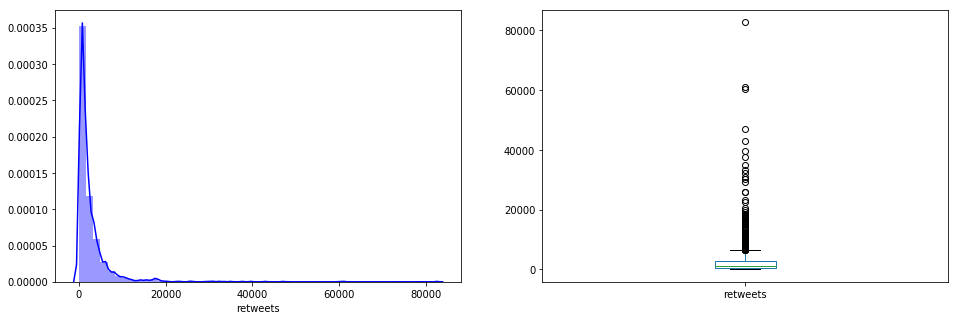

In [95]:
plt.figure(1)
plt.subplot(121)
sns.distplot(archive_clean['retweets'], color = 'blue')


plt.subplot(122)
archive_clean['retweets'].plot.box(figsize=(16,5))

plt.show()

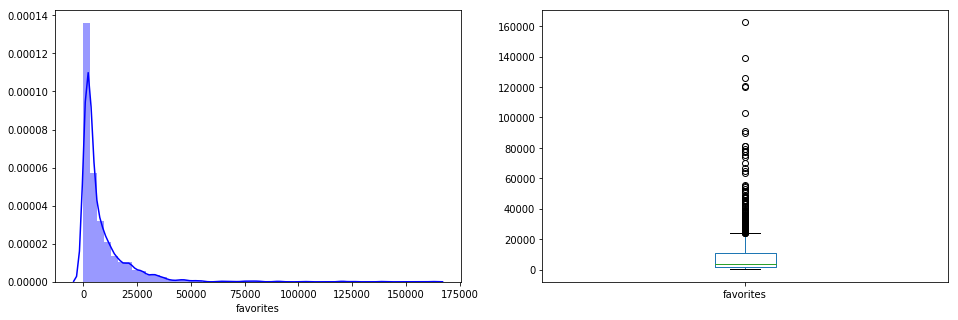

In [96]:
plt.figure(1)
plt.subplot(121)
sns.distplot(archive_clean['favorites'], color = 'blue')


plt.subplot(122)
archive_clean['favorites'].plot.box(figsize=(16,5))

plt.show()

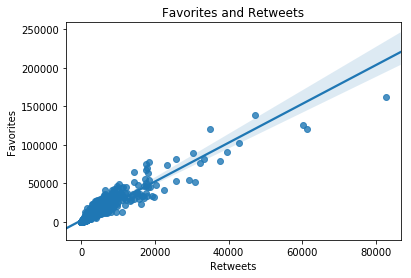

In [97]:
graph = sns.regplot(x=archive_clean.retweets, y=archive_clean.favorites)
plt.title("Favorites and Retweets")
plt.xlabel('Retweets')
plt.ylabel('Favorites')
# sns.plt.show()
fig = graph.get_figure()
fig.savefig('scatterplot.png')

It seems like Retweets and Favorites are highly correlated.This shows that people who have retweeted have also done with favorites tag. Hence both the distributions shows similar behaviour

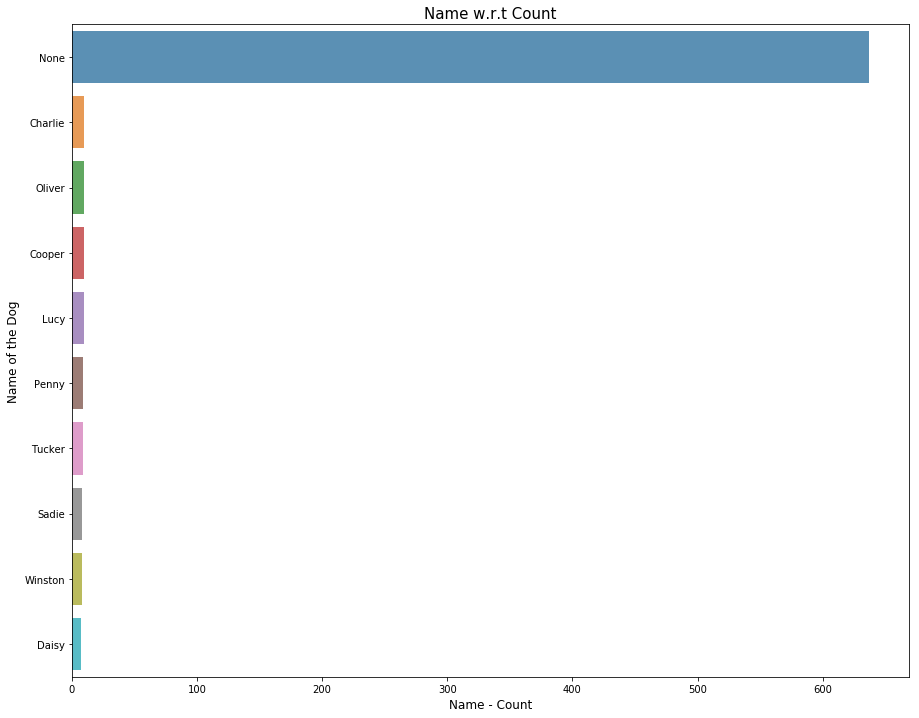

In [98]:
# Top dog name values based on the count
cnt_srs = archive_clean['name'].value_counts().head(10)
plt.figure(figsize=(15,12))
sns.barplot(y=cnt_srs.index, x=cnt_srs.values, alpha=0.8)
plt.xlabel('Name - Count', fontsize=12)
plt.ylabel('Name of the Dog', fontsize=12)
plt.title("Name w.r.t Count", fontsize=15)
plt.show()

Majority of dog names are none

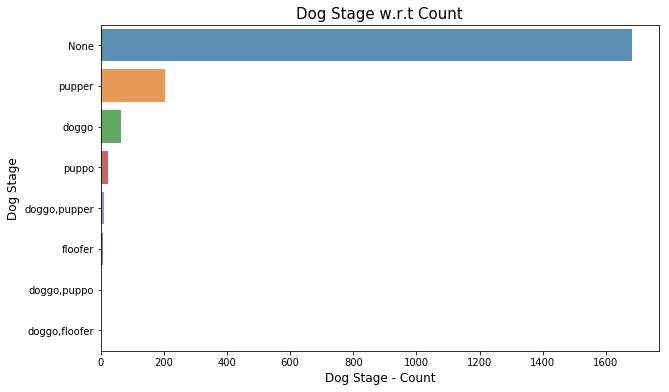

In [99]:
# Top Dog_stage values based on the count
cnt_srs = archive_clean['dog_stage'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(y=cnt_srs.index, x=cnt_srs.values, alpha=0.8)
plt.xlabel('Dog Stage - Count', fontsize=12)
plt.ylabel('Dog Stage', fontsize=12)
plt.title("Dog Stage w.r.t Count", fontsize=15)
plt.show()

Most of the dog stage names are none. Pupper is more common dog state names as compared to other none stage names.